# Problem 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet('train.parquet')

In [3]:
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


# Target drop off rate analysis

In [4]:
## calculate the ideal treatment

ideal_duration=12

ideal_duration_months=ideal_duration*30/365


In [5]:
# Filter for "Target Drug" incidents only
df_target = df[df['Incident'] == 'TARGET DRUG']

In [7]:
df_target.shape

(67218, 3)

In [9]:
# Assuming 'target_drug' is a DataFrame containing the relevant data
df_target['Date'] = pd.to_datetime(df_target['Date'])

# Resample the data by month and count the unique 'Patient-Uid'
dropoff_count = df_target.resample('M', on='Date')['Patient-Uid'].nunique()
dropoff_count.head()

C:\TEMP\ipykernel_13576\330603786.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Date'] = pd.to_datetime(df_target['Date'])


Date
2017-02-28     1
2017-03-31     2
2017-04-30     1
2017-05-31     5
2017-06-30    11
Freq: M, Name: Patient-Uid, dtype: int64

In [10]:
dropoff_rate=dropoff_count/ideal_duration_months

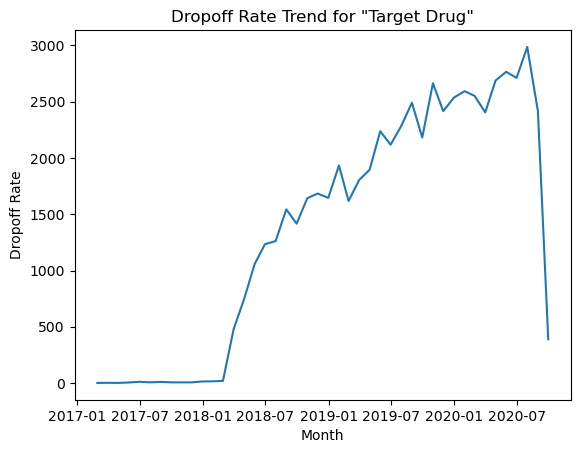

In [11]:
plt.plot(dropoff_rate)
plt.title('Dropoff Rate Trend for "Target Drug"')
plt.xlabel('Month')
plt.ylabel('Dropoff Rate')
plt.show()

In [21]:
##Calculate the number of unique patients for each dropoff incident in the DataFrame 'df'

dropoff_reasons = df.groupby('Incident')['Patient-Uid'].nunique()
print(dropoff_reasons)

Incident
DRUG_TYPE_0          24627
DRUG_TYPE_1          21716
DRUG_TYPE_10          2647
DRUG_TYPE_11         11917
DRUG_TYPE_12           875
DRUG_TYPE_13          1336
DRUG_TYPE_14           601
DRUG_TYPE_15          1015
DRUG_TYPE_16           347
DRUG_TYPE_17           143
DRUG_TYPE_18             1
DRUG_TYPE_2          23967
DRUG_TYPE_3          11261
DRUG_TYPE_4           2162
DRUG_TYPE_5          12139
DRUG_TYPE_6          23115
DRUG_TYPE_7          25492
DRUG_TYPE_8          13672
DRUG_TYPE_9           8612
PRIMARY_DIAGNOSIS    27033
SYMPTOM_TYPE_0       12612
SYMPTOM_TYPE_1        3980
SYMPTOM_TYPE_10       2625
SYMPTOM_TYPE_11       1426
SYMPTOM_TYPE_12       1302
SYMPTOM_TYPE_13        702
SYMPTOM_TYPE_14        924
SYMPTOM_TYPE_15       1240
SYMPTOM_TYPE_16       1663
SYMPTOM_TYPE_17       1219
SYMPTOM_TYPE_18        359
SYMPTOM_TYPE_19        171
SYMPTOM_TYPE_2        3500
SYMPTOM_TYPE_20         41
SYMPTOM_TYPE_21        196
SYMPTOM_TYPE_22        173
SYMPTOM_TYPE_23    

In [22]:
###Sort the dropoff reasons in descending order (highest to lowest) based on the number of unique patients

sorted_dropoff_reasons = dropoff_reasons.sort_values(ascending=False)


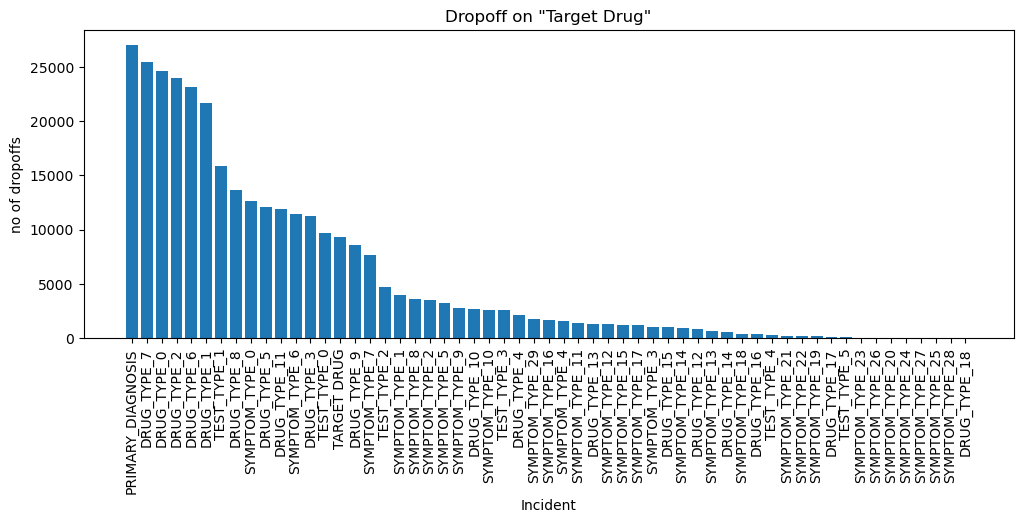

In [24]:
##Create a bar plot to visualize the dropoff on the "Target Drug" with sorted dropoff reasons data
fig=plt.figure(figsize=(12,4))
plt.bar(sorted_dropoff_reasons.index, sorted_dropoff_reasons)
plt.title('Dropoff on "Target Drug"')
plt.xticks(rotation=90)
plt.xlabel('Incident')
plt.ylabel('no of dropoffs')
plt.show()